In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r"C:\Users\OJAS\UScomments.csv",error_bad_lines=False)

C:\Users\OJAS\AppData\Local\Temp\ipykernel_17680\4287541031.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r"C:\Users\OJAS\UScomments.csv",error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\OJAS\AppData\Local\Temp\ipykernel_17680\4287541031.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r"C:\Users\OJAS\UScomments.csv",error_bad_lines=False)


In [3]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
# lets find the missing values in data

comments.isnull()

video_id  comment_text  likes  replies
0          False         False  False    False
1          False         False  False    False
2          False         False  False    False
3          False         False  False    False
4          False         False  False    False
...          ...           ...    ...      ...
691395     False         False  False    False
691396     False         False  False    False
691397     False         False  False    False
691398     False         False  False    False
691399     False         False  False    False

[691400 rows x 4 columns]

In [5]:
# drop missing values as we have very few & update the dataframe
comments.dropna(inplace = True)

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Performing Sentimental Anlaysis 

In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


- In short, Sentiment analysis is all about analyzing sentiment of users
- Lets Perform sentiment analysis using TextBlob which is a NLP library built on top Of NTLK (Natural Language toolkit)

In [8]:
comments.head(6)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0

In [9]:
from textblob import TextBlob

In [10]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [11]:
# It is a neutral language

In [12]:
comments.shape

(691375, 4)

In [13]:
# Inserting polarity values into comments dataframe while defining feature name as polarity

In [14]:
sample_df = comments[0:1000]

In [15]:
sample_df.shape

(1000, 4)

In [16]:
polarity = []
for comment in comments["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [17]:
len(polarity)

691375

In [18]:
comments['polarity']  = polarity

In [20]:
comments.head(5)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [21]:
filter1 = comments['polarity']==1

In [29]:
comments_positive = comments[filter1]

In [27]:
filter2 = comments['polarity']== -1

In [30]:
comments_negative = comments[filter2]

In [32]:
comments_positive.head(10)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   
325  sjlHnJvXdQs                   This is awesome. 1:20 XDDDDDDDDD     0   
416  cMKX2tE5Luk                                 BEST MOVIE EVER!!!     0   
433  cMKX2tE5Luk  Power is the disease.  Care is the cure.  Keep...     0   
447  cMKX2tE5Luk       The greatest movie about the greatest movie.     0   
469  cMKX2tE5Luk         It's Harry guys he's Spiderman best friend     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0  
325       0       1.0  
416       0       1.0  
433       0       1.0  
447       0       1.0  
469       0       1.0

In [36]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/300.2 kB 919.0 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


In [38]:
from wordcloud import WordCloud , STOPWORDS

In [39]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [40]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [41]:
type(comments['comment_text'])

pandas.core.series.Series

In [43]:
## for wordcloud, we need to frame our 'comment_text' feature into string 
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [44]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

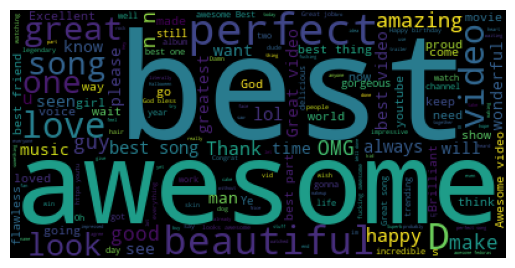

In [46]:
plt.imshow(wordcloud)
plt.axis('off')

In [49]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [51]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

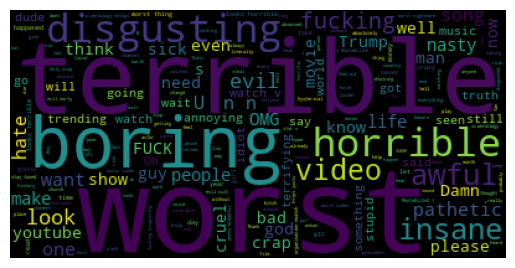

In [52]:
plt.imshow(wordcloud2)
plt.axis('off')

### Conclusion:
- positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc.
- Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc.

# Performing Emoji Analysis

In [54]:
pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/98/00/00d56e704d69cee4a92b1d517676579b4af5f2f8bc72946c464a504705b2/emoji-2.10.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
    --------------------------------------- 10.2/421.5 kB ? eta -:--:--
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- ------------------------------------ 30.7/421.5 kB 445.2 kB/s eta 0:00:01
   -- -----------

In [55]:
import emoji

In [57]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [58]:
comment = 'trending 😉'

In [59]:
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        

In [60]:
emoji_list

['😉']

In [63]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [64]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [67]:
# Now count number of each emoji amd plotted in the bar chart

In [66]:
from collections import Counter

In [69]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [71]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 36987)

In [72]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [73]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [74]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [75]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [78]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [79]:
Counter(all_emojis_list).most_common(10)[1][1]

33453

In [80]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [81]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [82]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [84]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [89]:
trace = go.Bar(x = emojis, y=freqs)

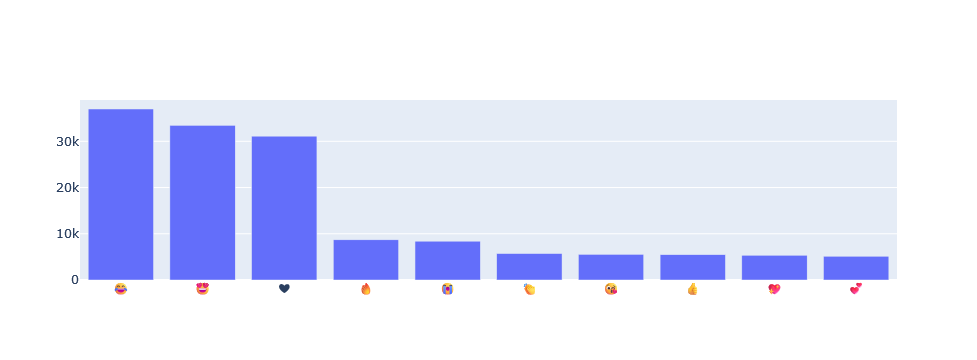

In [90]:
iplot([trace])

# Entire Data of Youtube : Data Collection 

In [91]:
import os

In [94]:
files = os.listdir(r'C:\Users\OJAS\additional_data')

In [95]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [96]:
files_csv = [file for file in files if '.csv' in file]

In [97]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [98]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [101]:
full_df.shape

(375942, 16)

## Exporting Data in csv,json,db

In [104]:
full_df[full_df.duplicated()].shape #no of duplicate rows 

(36417, 16)

In [105]:
full_df.drop_duplicates()

video_id trending_date  \
0       n1WpP7iowLc      17.14.11   
1       0dBIkQ4Mz1M      17.14.11   
2       5qpjK5DgCt4      17.14.11   
3       d380meD0W0M      17.14.11   
4       2Vv-BfVoq4g      17.14.11   
...             ...           ...   
375936  1PhPYr_9zRY      18.14.06   
375938  1h7KV2sjUWY      18.14.06   
375939  D6Oy4LfoqsU      18.14.06   
375940  oV0zkMe1K8s      18.14.06   
375941  ooyjaVdt-jA      18.14.06   

                                                    title  \
0             Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect (Official Music Video)   
...                                                   ...   
375936  BTS Plays With Puppies While Answering Fan Que...   
375938                         True Facts : Ant Mutualism   
375939  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
375940                How Black Panther Should Have Ended   
375941  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                   channel_title  category_id              publish_time  \
0                     EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                      iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                   Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                       nigahiga           24  2017-11-12T18:01:41.000Z   
4                     Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                          ...          ...                       ...   
375936            BuzzFeed Celeb           22  2018-05-18T16:39:29.000Z   
375938                  zefrank1           22  2018-05-18T01:00:06.000Z   
375939                Brad Mondo           24  2018-05-18T17:34:22.000Z   
375940  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
375941              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                     tags     views    likes  \
0       Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1       plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2       racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3       ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4       edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                   ...       ...      ...   
375936  BuzzFeed|"BuzzFeedVideo"|"Puppy Interview"|"pu...   8259128   645888   
375938                                             [none]   1064798    60008   
375939  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
375940  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
375941      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

        dislikes  comment_count  \
0          43420         125882   
1           1688          13030   
2           5339           8181   
3           1989          17518   
4          21082          85067   
...          ...            ...   
375936      4052          62610   
375938       382           3936   
375939      1032           3992   
375940      2846          13088   
375941    212976         144795   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1       https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2       https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3       https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4       https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                                ...                ...   
375936  htt

In [106]:
full_df.shape

(375942, 16)

# Storing Data into CSV 

In [111]:
full_df.to_csv(r'C:\Users\OJAS\New folder\youtubetextanalysis_sample.csv', index = False)

# Storing Data in JSON

In [112]:
full_df.to_csv(r'C:\Users\OJAS\New folder\youtubetextanalysis_sample.json', index = False)

# Storing Data in Database (DB)

In [113]:
# Creating engine that allows to connect with database

from sqlalchemy import create_engine

In [116]:
engine = create_engine(r'sqlite:///C:\Users\OJAS\New folder\youtube_sample.sqlite')

In [118]:
full_df.to_sql('users', con=engine, if_exists='append')

375942

# Categories have maximum likes 

In [119]:
full_df.head(5)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...  
3  I know it's been a while since we did this sho...  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...

In [120]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [121]:
json_df = pd.read_json(r'C:\Users\OJAS\additional_data/US_category_id.json')

In [122]:
json_df

kind  \
0   youtube#videoCategoryListResponse   
1   youtube#videoCategoryListResponse   
2   youtube#videoCategoryListResponse   
3   youtube#videoCategoryListResponse   
4   youtube#videoCategoryListResponse   
5   youtube#videoCategoryListResponse   
6   youtube#videoCategoryListResponse   
7   youtube#videoCategoryListResponse   
8   youtube#videoCategoryListResponse   
9   youtube#videoCategoryListResponse   
10  youtube#videoCategoryListResponse   
11  youtube#videoCategoryListResponse   
12  youtube#videoCategoryListResponse   
13  youtube#videoCategoryListResponse   
14  youtube#videoCategoryListResponse   
15  youtube#videoCategoryListResponse   
16  youtube#videoCategoryListResponse   
17  youtube#videoCategoryListResponse   
18  youtube#videoCategoryListResponse   
19  youtube#videoCategoryListResponse   
20  youtube#videoCategoryListResponse   
21  youtube#videoCategoryListResponse   
22  youtube#videoCategoryListResponse   
23  youtube#videoCategoryListResponse   
24  youtube#videoCategoryListResponse   
25  youtube#videoCategoryListResponse   
26  youtube#videoCategoryListResponse   
27  youtube#videoCategoryListResponse   
28  youtube#videoCategoryListResponse   
29  youtube#videoCategoryListResponse   
30  youtube#videoCategoryListResponse   
31  youtube#videoCategoryListResponse   

                                                 etag  \
0   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
5   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
6   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
7   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
8   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
9   "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
10  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
11  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
12  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
13  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
14  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
15  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
16  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
17  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
18  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
19  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
20  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
21  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
22  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
23  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
24  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
25  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
26  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
27  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
28  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
29  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
30  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
31  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                                items  
0   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
5   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
6   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
7   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
8   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
9   {'kind': 'youtube#videoCategory', 'etag': '"m2...  
10  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
11  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
12  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
13  {'kind': 

In [123]:
json_df['items']

0     {'kind': 'youtube#videoCategory', 'etag': '"m2...
1     {'kind': 'youtube#videoCategory', 'etag': '"m2...
2     {'kind': 'youtube#videoCategory', 'etag': '"m2...
3     {'kind': 'youtube#videoCategory', 'etag': '"m2...
4     {'kind': 'youtube#videoCategory', 'etag': '"m2...
5     {'kind': 'youtube#videoCategory', 'etag': '"m2...
6     {'kind': 'youtube#videoCategory', 'etag': '"m2...
7     {'kind': 'youtube#videoCategory', 'etag': '"m2...
8     {'kind': 'youtube#videoCategory', 'etag': '"m2...
9     {'kind': 'youtube#videoCategory', 'etag': '"m2...
10    {'kind': 'youtube#videoCategory', 'etag': '"m2...
11    {'kind': 'youtube#videoCategory', 'etag': '"m2...
12    {'kind': 'youtube#videoCategory', 'etag': '"m2...
13    {'kind': 'youtube#videoCategory', 'etag': '"m2...
14    {'kind': 'youtube#videoCategory', 'etag': '"m2...
15    {'kind': 'youtube#videoCategory', 'etag': '"m2...
16    {'kind': 'youtube#videoCategory', 'etag': '"m2...
17    {'kind': 'youtube#videoCategory', 'etag': 

In [124]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [125]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [126]:
cat_dict ={}
for item in json_df['items'].values:
    cat_dict[int(item['id'])]= item['snippet']['title']

In [127]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [129]:
full_df['category_id'] = full_df['category_id'].map(cat_dict)

In [130]:
full_df.head(4)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   

     category_id              publish_time  \
0          Music  2017-11-10T17:00:03.000Z   
1         Comedy  2017-11-13T17:00:00.000Z   
2         Comedy  2017-11-12T19:05:24.000Z   
3  Entertainment  2017-11-12T18:01:41.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828  132239   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...  
3  I know it's been a while since we did this sho...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

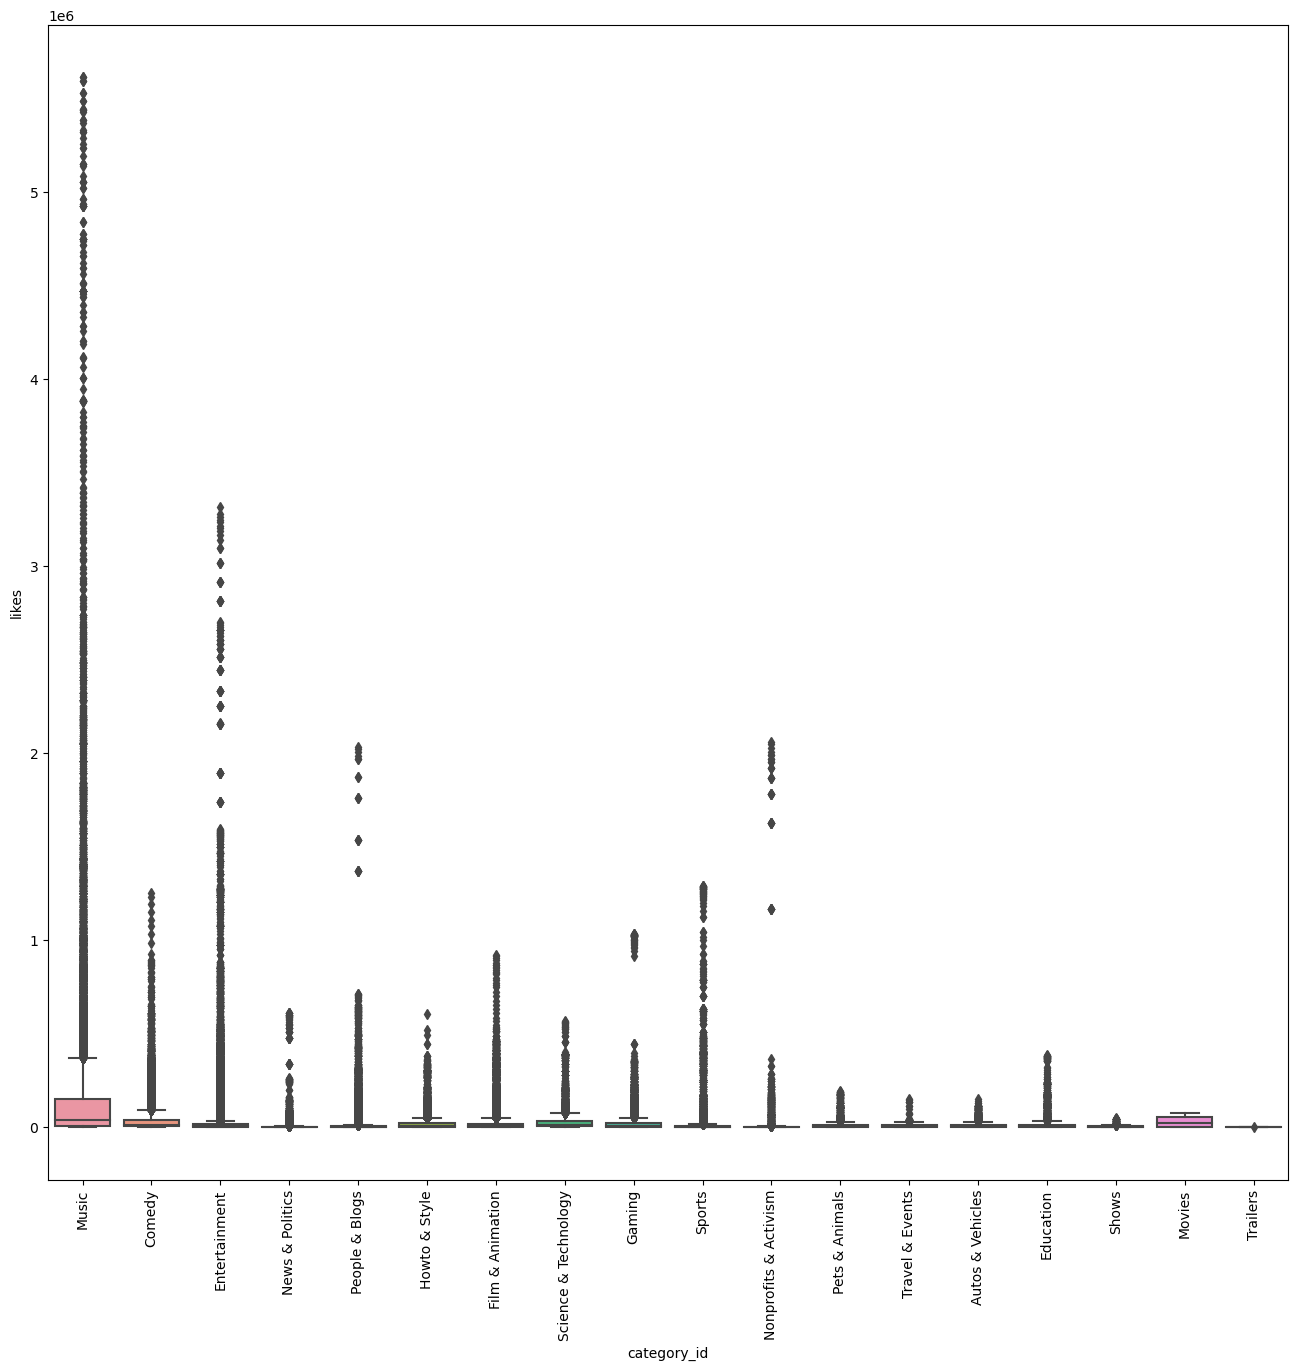

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(16,15))
sns.boxplot(x ='category_id',y ='likes', data = full_df)
plt.xticks(rotation = 'vertical')

## Finding out whether audience is engaged or not

In [146]:
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

In [147]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'like_rate', 'dislike_rate',
       'comment_count_rate'],
      dtype='object')

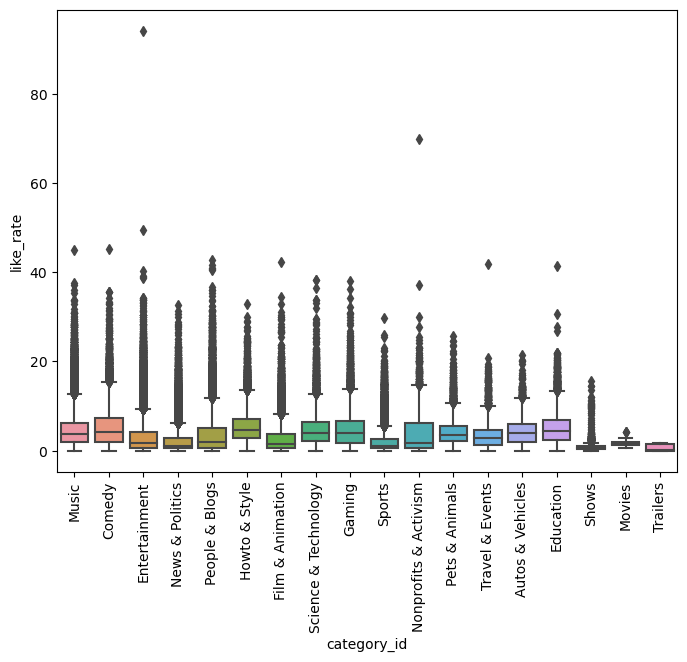

In [150]:
plt.figure(figsize=(8,6))
sns.boxplot(x ='category_id',y ='like_rate', data = full_df)
plt.xticks(rotation = 'vertical')
plt.show()

# Analysing Relationship b/w likes & views

<Axes: xlabel='views', ylabel='likes'>

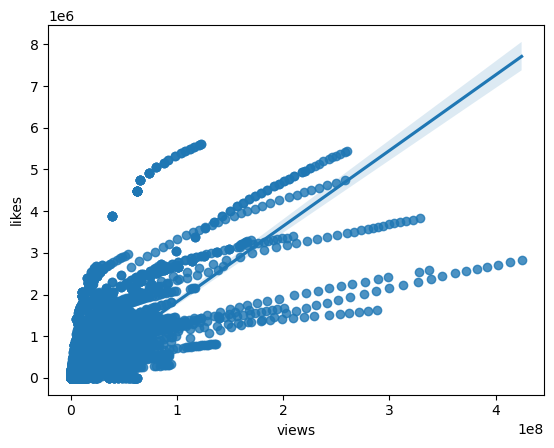

In [151]:
sns.regplot(x = "views", y ="likes", data = full_df)

In [152]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'like_rate', 'dislike_rate',
       'comment_count_rate'],
      dtype='object')

In [153]:
full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

<Axes: >

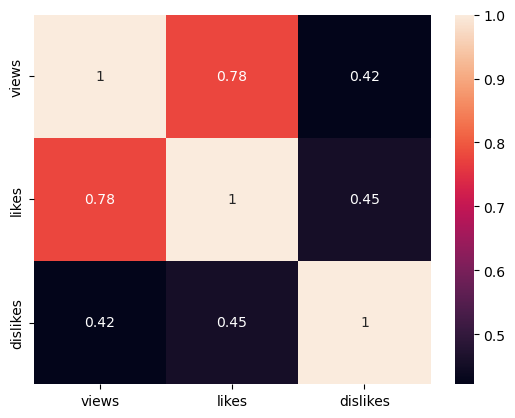

In [155]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot= True)

# Analyzing Trending Videos

In [169]:
full_df.head(6)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...    DramaAlert   

       category_id              publish_time  \
0            Music  2017-11-10T17:00:03.000Z   
1           Comedy  2017-11-13T17:00:00.000Z   
2           Comedy  2017-11-12T19:05:24.000Z   
3    Entertainment  2017-11-12T18:01:41.000Z   
4            Music  2017-11-09T11:04:14.000Z   
5  News & Politics  2017-11-13T07:37:51.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
5      4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   

                                         description  like_rate  dislike_rate  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...   4.589104      0.253051   
1  STill got a lot of packages. Probably will las...  12.594873      0.166363   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...   4.575843      0.167292   
3  I know it's been a while since we did this sho...   6.309630      0.094903   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...   4.874563      0.062887   
5  âº Follow for News! - https://twitter.com/KEE...   7.922049      0.352218   

   comment_count_rate  
0            0.733639  
1            1.284185  
2            0.256342  
3            0.835851  
4            0.253752  
5            0.927160

In [170]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
DFC Orrivals                            1
haiblubbblubb                           1
SOYER                                   1
GOLD CLAN                               1
Herr Zymny                              1
Name: channel_title, Length: 37824, dtype: int64

In [160]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [161]:
cdf 

channel_title    0
0      The Late Show with Stephen Colbert  984
1                                     WWE  804
2             Late Night with Seth Meyers  773
3                               VikatanTV  763
4                            TheEllenShow  743
...                                   ...  ...
37819                   LIGHTS - 001 jrny    1
37820                          bangtanist    1
37821                      LIGAMX Femenil    1
37822             LIGA COLOMBIANA OFICIAL    1
37823                    Pavel Sidorik TV    1

[37824 rows x 2 columns]

In [172]:
cdf = cdf.rename(columns={0:'total_videos'})

In [173]:
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

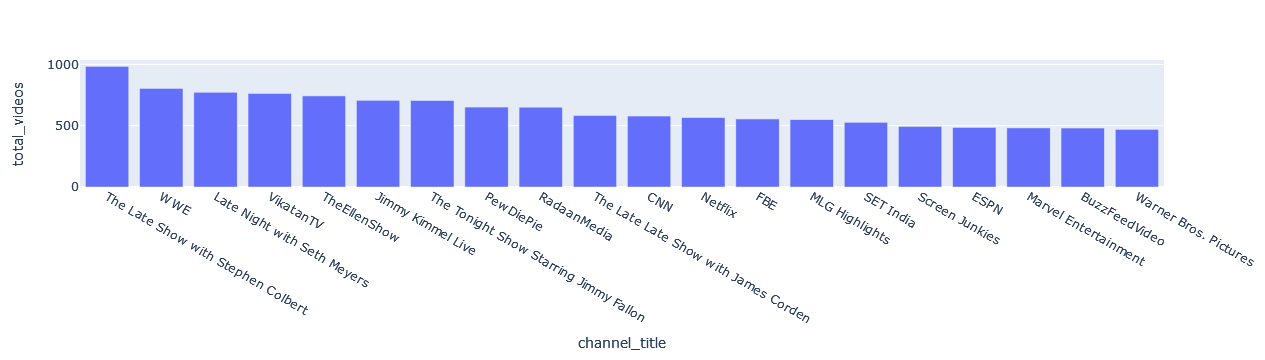

In [174]:
import plotly.express as px

px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')


# Does Punctuations have an impact on views,likes, dislikes ?

In [175]:
full_df['title'][0]

'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'

In [176]:
import string 

In [177]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [178]:
[char for char in full_df['title'][0] if char in string.punctuation]

['-', '(', ')', '.']

In [179]:
len([char for char in full_df['title'][0] if char in string.punctuation])

4

In [181]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [182]:
full_df['title'].apply(punc_count)

0         4
1         1
2         3
3         3
4         3
         ..
375937    0
375938    1
375939    3
375940    0
375941    1
Name: title, Length: 375942, dtype: int64

In [191]:
sample = full_df[0:37824]
sample["punc_count"] = sample["title"].apply(punc_count)

In [192]:
sample["punc_count"]

0        4
1        1
2        3
3        3
4        3
        ..
37819    0
37820    2
37821    1
37822    0
37823    2
Name: punc_count, Length: 37824, dtype: int64

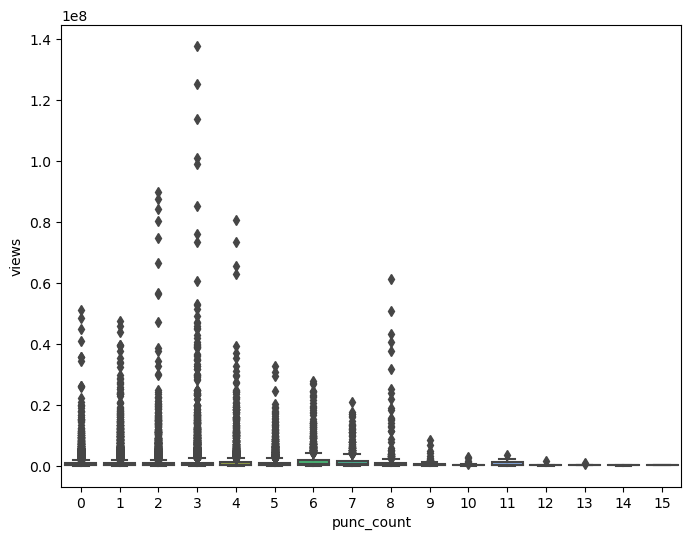

In [193]:
plt.figure(figsize=(8,6))
sns.boxplot(x="punc_count", y="views", data=sample)
plt.show()
